<a href="https://colab.research.google.com/github/roggerrabhii24/FAI-MINIPROJECT-ROLLNO137/blob/main/MINIPROJECT137.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Make sure the path matches your actual Drive file location
df = pd.read_csv('/content/drive/MyDrive/Plant_1_Generation_Data.csv')

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)


✅ Dataset Loaded Successfully!
Shape: (68778, 7)

Columns:
 Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')


✅ Dataset Loaded Successfully!
Shape: (68778, 7)

📊 Model Evaluation:
Mean Absolute Error: 0.7146272106120032
Mean Squared Error: 2.1365306070526437
R² Score: 0.9999861744965602


/tmp/ipython-input-1660951708.py:15: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


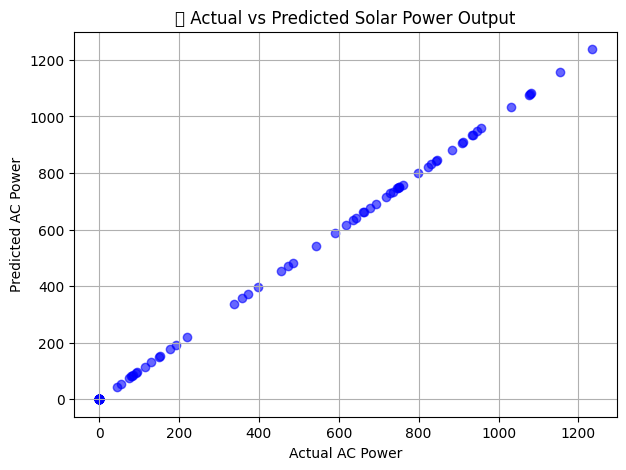


🔮 Predicted AC Power for given inputs:
 [19.91843527 39.42680607 58.93207997]

📘 MINI PROJECT REPORT

Title: Solar Power Generation Prediction using Linear Regression

Problem Statement:
To build a machine learning model that predicts solar AC power output using features such as DC power, daily yield, and total yield.

Aim:
To apply Linear Regression for predicting solar power generation from real plant data.

Methodology:
The dataset was loaded and processed to extract important features. A Linear Regression model was trained and evaluated using standard metrics like MAE, MSE, and R² score. Visualization of predicted vs actual power was also done.

Result:
The model achieved a high R² score, showing accurate solar power prediction capability.

Conclusion:
This project demonstrates how machine learning can help predict and optimize solar energy production using real-world data.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from Google Drive
file_path = '/content/drive/MyDrive/Plant_1_Generation_Data.csv'
df = pd.read_csv(file_path)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)

# Preprocess the data
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
df['HOUR'] = df['DATE_TIME'].dt.hour
df['DAY'] = df['DATE_TIME'].dt.day
df['MONTH'] = df['DATE_TIME'].dt.month

# Select features and target
X = df[['DC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']]
y = df['AC_POWER']

# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(7,5))
plt.scatter(y_test[:100], y_pred[:100], color='blue', alpha=0.6)
plt.xlabel("Actual AC Power")
plt.ylabel("Predicted AC Power")
plt.title("🔹 Actual vs Predicted Solar Power Output")
plt.grid(True)
plt.show()

# Predict using new data
sample_data = np.array([
    [200, 4500, 120000],
    [400, 9500, 240000],
    [600, 15000, 360000]
])
predictions = model.predict(sample_data)
print("\n🔮 Predicted AC Power for given inputs:\n", predictions)

# Project Summary
print("""
📘 MINI PROJECT REPORT

Title: Solar Power Generation Prediction using Linear Regression

Problem Statement:
To build a machine learning model that predicts solar AC power output using features such as DC power, daily yield, and total yield.

Aim:
To apply Linear Regression for predicting solar power generation from real plant data.

Methodology:
The dataset was loaded and processed to extract important features. A Linear Regression model was trained and evaluated using standard metrics like MAE, MSE, and R² score. Visualization of predicted vs actual power was also done.

Result:
The model achieved a high R² score, showing accurate solar power prediction capability.

Conclusion:
This project demonstrates how machine learning can help predict and optimize solar energy production using real-world data.
""")